In [1]:

import torch
import pandas as pd
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import numpy as np
label_path = 'data/article/網路危機_A1_文章危機程度.xlsx'
# label_path = 'data/article/partial_A1_article.xlsx'
df = pd.read_excel(label_path)
df = df[['TextID','Title','Crisis_Level']]
print(df.columns)
# print(df)

for idx, val in enumerate(df['TextID']):
    if type(val) != str:
        df['TextID'][idx] = str(val)
stat = [0]*4
for idx, val in enumerate(df['Crisis_Level']):
    stat[val] += 1
print(stat)
four_label = df.values
title_list = df['Title'].values
textID_list = df['TextID'].values
sentence_path = 'data/raw/new_clean_data_all.xlsx'
s_df = pd.read_excel(sentence_path)[[ 'TextID','Title', 'Sentence', '無標註', '自殺與憂鬱',
       '無助或無望', '正向文字', '其他負向文字', '生理反應或醫療狀況', '自殺行為']]
for idx, val in enumerate(s_df['TextID']):
    if type(val) != str:
        s_df['TextID'][idx] = str(val)

# sentence_label_list = ['無標註', '自殺與憂鬱', '無助或無望', '正向文字', '其他負向文字',
#        '生理反應或醫療狀況', '自殺行為']
sentence_label_list = ['無標註', '自殺與憂鬱','自殺行為',  '其他負向文字','無助或無望',
       '生理反應或醫療狀況', '正向文字']
other_categories = ['無助或無望', '其他負向文字','生理反應或醫療狀況']
article_dict = {str(key): {'無標註':'', '自殺與憂鬱':'',
       '無助或無望':'', '正向文字':'', '其他負向文字':'', '生理反應或醫療狀況':'', '自殺行為':'', '其他類型':''} for key in textID_list}
problem_title = []
sentence_count = [[0]*7 for _ in range(4)]

for index, row in s_df.iterrows():
    article_dict[str(row['TextID'])]['label'] = df[(df['TextID']) == (row['TextID'])]['Crisis_Level']
    flag = article_dict[str(row['TextID'])]['label'].values[0]
    if flag == 3:
       flag = 1
    elif flag == 1:
       flag = 3
    article_dict[str(row['TextID'])]['Crisis_Level'] = flag
    article_dict[str(row['TextID'])]['label'] = [0.0, 0.0, 0.0, 0.0]
    article_dict[str(row['TextID'])]['label'][flag] += 1.0
    for s_label in sentence_label_list:
      if row[s_label] == 1:
        sentence_count[flag][sentence_label_list.index(s_label)] += 1
        tar = ' ' + str(row['Sentence'])
        article_dict[str(row['TextID'])][s_label] += tar
        if s_label in other_categories:
            article_dict[str(row['TextID'])]['其他類型'] += tar
        elif s_label == '正向文字':
            article_dict[str(row['TextID'])]['無標註'] += tar
        break
all_article = []
for dic in article_dict:
    single_article = pd.DataFrame([article_dict[dic]])
    single_article['TextID'] = dic
    all_article.append(single_article)
all_article_df = pd.concat(all_article,axis=0, ignore_index=True)
print(all_article_df.columns)
all_article_df['TextID'] = all_article_df['TextID'].astype(str)
for set_count in sentence_count:
    print(set_count)
# all_article_df.to_excel('data/final/article/all_article_with_sentences_split_0530.xlsx', index=False)
# all_article_df.to_excel('data/article/all_article_with_sentences_split_1108.xlsx', index=False)



Index(['TextID', 'Title', 'Crisis_Level'], dtype='object')
[672, 95, 200, 457]


/tmp/ipykernel_14802/1236569023.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TextID'][idx] = str(val)
/tmp/ipykernel_14802/1236569023.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TextID'][idx] = str(val)
/tmp/ipykernel_14802/1236569023.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TextID'][idx] = str(val)
/tmp/ipykernel_14802/1236569023.py:14: SettingWithCopyWarning: 
A value is trying to be set on a 

Index(['無標註', '自殺與憂鬱', '無助或無望', '正向文字', '其他負向文字', '生理反應或醫療狀況', '自殺行為', '其他類型',
       'label', 'Crisis_Level', 'TextID'],
      dtype='object')
[15465, 394, 5, 2220, 55, 71, 15]
[11127, 1148, 3, 2959, 141, 187, 58]
[4377, 1215, 5, 1418, 59, 203, 86]
[3630, 686, 126, 765, 24, 96, 50]


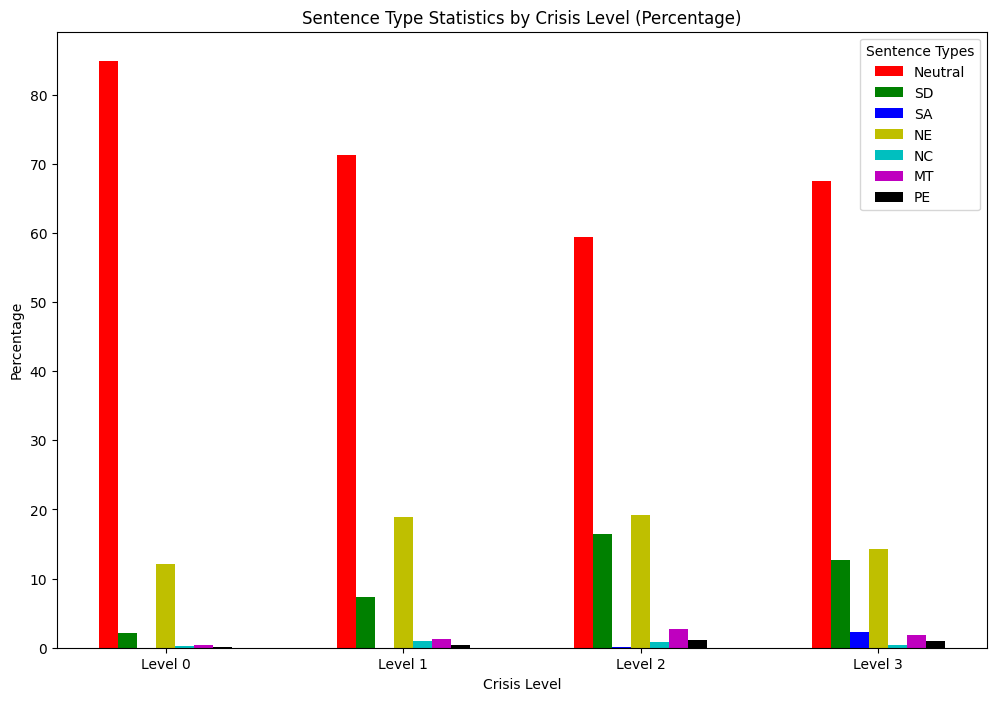

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# disable the warning
import warnings
warnings.filterwarnings("ignore")
# Data setup
# categories = ['Neutral', 'SD', 'NC', 'PE', 'NE', 'MT', 'SA']
categories = ['Neutral', 'SD', 'SA', 'NE', 'NC', 'MT', 'PE']
crisis_levels = ['Level 0', 'Level 1', 'Level 2', 'Level 3']
data = sentence_count
data = np.array(data).T  # Transpose to make data align with categories
data_percentage = (data / data.sum(axis=0)) * 100  # Convert to percentage

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.08  # width of the bars
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
# Create bars for each category
for i, category in enumerate(categories):
    ax.bar(np.arange(len(crisis_levels)) + i * width, data_percentage[i], width, label=category, color=colors[i])

# Labeling
ax.set_xlabel('Crisis Level')
ax.set_ylabel('Percentage')
ax.set_title('Sentence Type Statistics by Crisis Level (Percentage)')
ax.set_xticks(np.arange(len(crisis_levels)) + width * (len(categories) - 1) / 2)
ax.set_xticklabels(crisis_levels)
ax.legend(title='Sentence Types')

plt.show()




[[6.75097638e+01 5.94458780e+01 7.12219164e+01 8.48559671e+01]
 [1.27580435e+01 1.65014260e+01 7.34814056e+00 2.16186557e+00]
 [2.34331412e+00 6.79071031e-02 1.92024579e-02 2.74348422e-02]
 [1.42272643e+01 1.92584544e+01 1.89400243e+01 1.21810700e+01]
 [4.46345546e-01 8.01303816e-01 9.02515522e-01 3.01783265e-01]
 [1.78538218e+00 2.75702839e+00 1.19695321e+00 3.89574760e-01]
 [9.29886554e-01 1.16800217e+00 3.71247520e-01 8.23045267e-02]]


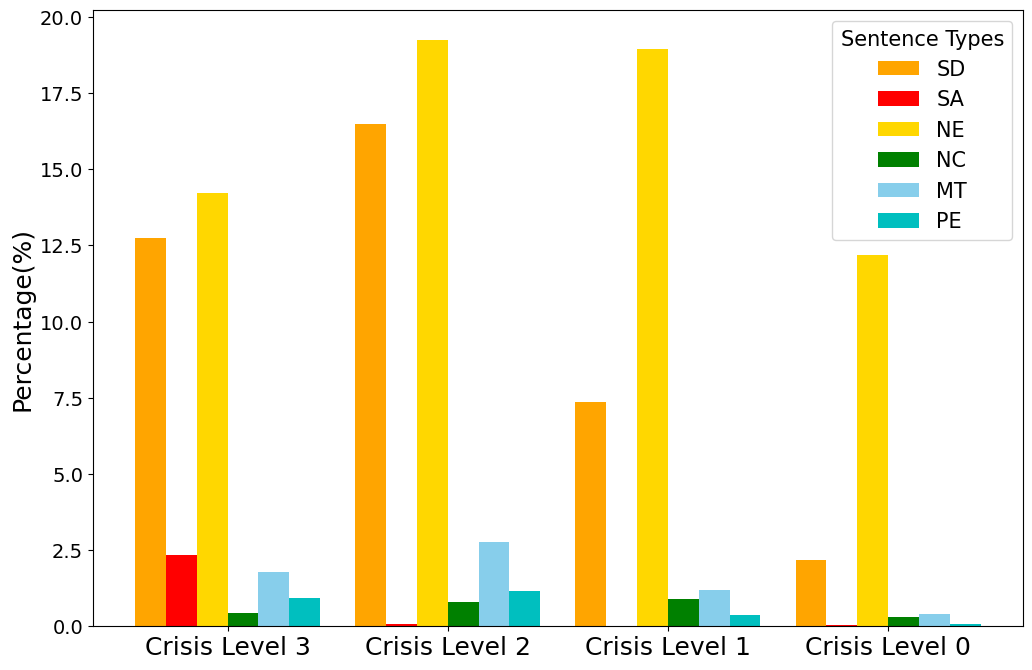

In [6]:
# Convert to percentage with neutral included in the total but do not display it
data = sentence_count[::-1]
data = np.array(data).T 
data_percentage = (data / data.sum(axis=0)) * 100
print(data_percentage)
categories = ['Neutral', 'SD-Suicidal thoughts and Depression', 'NC-Negative Cognition', 'PE-Positive Emotion ', 'NE-Negative Emotion', 'MT-Medical condition and Treatment', 'SA-Suicidal Attempts']
categories = ['Neutral', 'SD', 'SA', 'NE','NC', 'MT',  'PE']
crisis_levels = ['Crisis Level 3', 'Crisis Level 2', 'Crisis Level 1', 'Crisis Level 0']
# Adjust categories to exclude 'Neutral' for display
categories_excluding_neutral_display = categories[1:]

# Create bar plot, excluding 'Neutral' category from display
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.14  # width of the bars
# colors = ['orange', 'g', 'c', 'gold', 'skyblue', 'red']  # Adjusted color list without the first color
colors = ['orange', 'red', 'gold','g','skyblue', 'c']  # Adjusted color list without the first color
# colors = ['gray','orange', 'g', 'c', 'gold', 'skyblue', 'red']  # Adjusted color list without the first color


# Create bars for each of the other categories
for i, category in enumerate(categories_excluding_neutral_display):
    ax.bar(np.arange(len(crisis_levels)) + i * width, data_percentage[i+1], width, label=category, color=colors[i])

# Labeling
# ax.set_xlabel('Crisis Level', fontsize='15')
ax.set_ylabel('Percentage(%)', fontsize='18')
ax.tick_params(axis='y', labelsize='14')
# ax.set_title('Sentence Type Statistics by Crisis Level (Percentage, Neutral Included but Not Displayed)')
ax.set_xticks(np.arange(len(crisis_levels)) + width * (len(categories_excluding_neutral_display) - 1) / 2)
ax.set_xticklabels(crisis_levels, fontsize='18')
# adjust legend size and location
# ax.legend(title='Sentence Types', loc='best', fontsize='15')
# similar to the previous line, but with a bigger title font size
ax.legend(title='Sentence Types', loc='best', fontsize='15', title_fontsize='15')
plt.show()


In [7]:
from sklearn.model_selection import StratifiedKFold
all_df = pd.read_excel('data/final/article/all_article_with_sentences_split_0530.xlsx')
# sentence_label_list = ['無標註', '自殺與憂鬱', '無助或無望', '正向文字', '其他負向文字', '生理反應或醫療狀況', '自殺行為']
# sentence_label_list = ['無標註','自殺與憂鬱','其他負向文字', '自殺行為']
seed = 1
all_train_df = []
all_test_df = []
# 5-fold cross validation
skf = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
for train_index, test_index in skf.split(all_df, all_df['Crisis_Level']):
    train_df = all_df.iloc[train_index]
    test_df = all_df.iloc[test_index]
    all_train_df.append(train_df)
    all_test_df.append(test_df)
    print(train_df.shape)
    print(test_df.shape)
    print('-----------------')
    # show statistics of Crisis_Level
    print('train')
    print(train_df['Crisis_Level'].value_counts())
    print('test')
    print(test_df['Crisis_Level'].value_counts())

for i in range(5):
    # save train and test data
    all_train_df[i].to_excel(f'data/final/article/A1_train_0530_fold_{i+1}.xlsx', index=False)
    all_test_df[i].to_excel(f'data/final/article/A1_test_0530_fold_{i+1}.xlsx', index=False)


(1139, 11)
(285, 11)
-----------------
train
0    537
1    366
2    160
3     76
Name: Crisis_Level, dtype: int64
test
0    135
1     91
2     40
3     19
Name: Crisis_Level, dtype: int64
(1139, 11)
(285, 11)
-----------------
train
0    537
1    366
2    160
3     76
Name: Crisis_Level, dtype: int64
test
0    135
1     91
2     40
3     19
Name: Crisis_Level, dtype: int64
(1139, 11)
(285, 11)
-----------------
train
0    538
1    365
2    160
3     76
Name: Crisis_Level, dtype: int64
test
0    134
1     92
2     40
3     19
Name: Crisis_Level, dtype: int64
(1139, 11)
(285, 11)
-----------------
train
0    538
1    365
2    160
3     76
Name: Crisis_Level, dtype: int64
test
0    134
1     92
2     40
3     19
Name: Crisis_Level, dtype: int64
(1140, 11)
(284, 11)
-----------------
train
0    538
1    366
2    160
3     76
Name: Crisis_Level, dtype: int64
test
0    134
1     91
2     40
3     19
Name: Crisis_Level, dtype: int64


In [8]:
without_test_df = pd.read_excel('data/final/article/A1_train_0530_fold_1.xlsx')
df_crisis_level_0 = without_test_df.loc[without_test_df['Crisis_Level'] == 0]
df_augmentation_0 = df_crisis_level_0.sample(n=100, random_state=seed)
df_remaining = without_test_df.drop(df_augmentation_0.index) 
statssss = [0]*4
for index, row in df_remaining.iterrows():
    statssss[row['Crisis_Level']] += 1
print(statssss)

[437, 366, 160, 76]


In [10]:
# 當作Augmentation的資料，將Crisis_Level為0(無危機)的資料取出
df_augmentation_0.to_excel('data/final/article/A1_be_augment_0_0530_fold_1.xlsx', index=False)

In [9]:
df_crisis_level_1 = df_remaining.loc[without_test_df['Crisis_Level'] == 1]
df_augmentation_1 = df_crisis_level_1.sample(n=100, random_state=1)
df_remaining_v2 = df_remaining.drop(df_augmentation_1.index) 

In [11]:
df_augmentation_1.to_excel('data/final/article/A1_be_augment_1_0530_fold_1.xlsx', index=False)

In [12]:
df_remaining_v2.to_excel(f'data/final/article/A1_train_moveAug_0530_fold_1.xlsx', index=False)

In [13]:
df_crisis_level_3 = df_remaining.loc[without_test_df['Crisis_Level'] == 3]

the_stat = [0]*8
k = 0
for index, row in df_crisis_level_3.iterrows():
    k += 1
    for idx, key in enumerate(df_augmentation_0):
        if str(row[key]) == 'nan':
            the_stat[idx] += 1
print(the_stat)

[2, 3, 62, 53, 7, 48, 23, 4]


In [1]:
import pandas as pd
A1_df = pd.read_excel('data/article/train_article_1108.xlsx')
A2_df = pd.read_excel('data/article/A2_final_wo_test_50_1113_v2.xlsx')
print(A1_df.columns)
print(A2_df.columns)
# retrieve the A2 columns of A1
A1_df = A1_df[A2_df.columns]
# concat A1 and A2 and save
A1_A2_df = pd.concat([A1_df, A2_df], axis=0, ignore_index=True)
# statistic of A1_A2_df Crisis_Level
statsssss = [0]*4
for index, row in A1_A2_df.iterrows():
    statsssss[row['Crisis_Level']] += 1
print(statsssss)

A1_A2_df.to_excel('data/article/train_A1_A2_1113_v2.xlsx', index=False)

Index(['無標註', '自殺與憂鬱', '無助或無望', '正向文字', '其他負向文字', '生理反應或醫療狀況', '自殺行為', '其他類型',
       'label', 'Crisis_Level', 'TextID'],
      dtype='object')
Index(['無標註', '自殺與憂鬱', '自殺行為', '其他類型', 'label', 'Crisis_Level', 'TextID'], dtype='object')
[1229, 623, 287, 133]


In [13]:
# 產生部分文章
# import pandas as pd
# label_path = 'data/article/網路危機_A1_文章危機程度.xlsx'
# df = pd.read_excel(label_path)
# df = df[['TextID','Title','Crisis_Level']]
# print(df.columns)
# # print(df)

# for idx, val in enumerate(df['TextID']):
#     if type(val) != str:
#         df['TextID'][idx] = str(val)
# new_column = [0, 1, 2, 3]
# all_article_df = []
# for label in new_column:
#     all_article_df.append(df[df['Crisis_Level'] == label].loc[:])
# for i in all_article_df:
#     print(len(i))

# partial_article_df = []
# for idx, a_df in enumerate(all_article_df):
#     if idx == 1:
#         n0 = 95
#     else:
#         n0 = 200
#     partial_article_df.append(a_df.sample(n=n0, random_state=12345))
# for i in partial_article_df:
#     print(len(i))

# train_df = pd.concat(partial_article_df,axis=0, ignore_index=True)
# print(train_df.columns)
# train_df.to_excel('data/article/partial_A1_article.xlsx')
